<Figure size 1000x600 with 0 Axes>

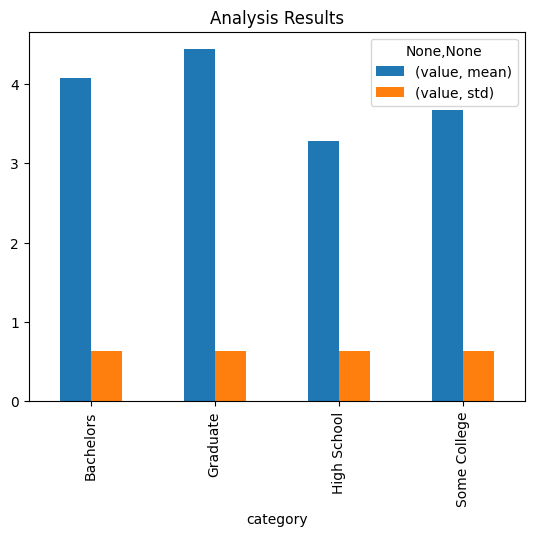

In [1]:
### Example 1: Data Processing Pipeline

# Combining concepts from previous lectures:
# - File operations (Lecture 1)
# - Data structures (Lecture 3)
# - Pandas for data (Lectures 5-6)
# - Visualization (Lecture 7)

# %pip install pandas matplotlib

import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import subprocess

# Get CSV files using shell command
cmd = "find data/ -name '*.csv' -type f"
files = subprocess.check_output(cmd, shell=True).decode().split('\n')

# Process each file
dfs = []
for file in files:
    if not file: continue
    df = pd.read_csv(file)
    # Data cleaning (Lecture 6)
    df = df.dropna()
    dfs.append(df)

# Combine and analyze
combined = pd.concat(dfs)
summary = combined.groupby('category').agg({
    'value': ['mean', 'std']
})

# Visualize (Lecture 7)
plt.figure(figsize=(10, 6))
summary.plot(kind='bar')
plt.title('Analysis Results')
plt.savefig('output/analysis.png')
plt.show()



In [4]:
def safe_divide(x, y):
    try:
        result = x / y
        return result
    except ZeroDivisionError:
        print("Error: Division by zero!")
        return None
    except TypeError as e:
        print(f"Error: Invalid types - {e}")
        return None
    finally:
        print("Division operation attempted")

# Example usage:
# print(10/0)
print(safe_divide(10, 0))       # Handles ZeroDivisionError
print(safe_divide("10", 2))     #

Error: Division by zero!
Division operation attempted
None
Error: Invalid types - unsupported operand type(s) for /: 'str' and 'int'
Division operation attempted
None


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

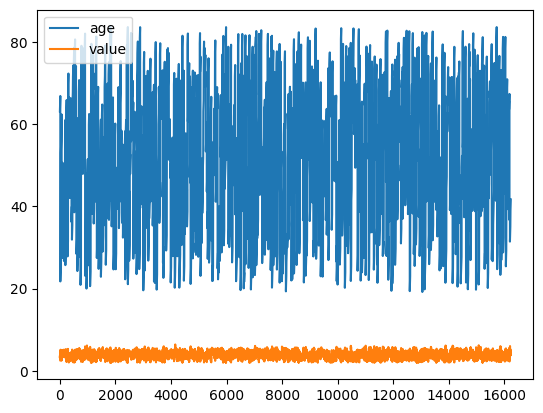

In [2]:
### Example 2: Automated Report Generation


# Using:
# - File handling (Lecture 1)
# - Functions (Lecture 4)
# - Data visualization (Lecture 7)
# - Basic ML for predictions (Lecture 8)

# %pip install scikit-learn

from datetime import datetime
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

def generate_report():
    # Load and process data
    data = pd.read_csv('data/ms_data_dirty.csv')
    
    # Create visualizations
    plt.figure(figsize=(12, 6))
    data.plot(kind='line')
    plt.savefig('output/trends.png')
    
    # Make predictions
    # patient_id,visit_date,time,age,category,value,site,room,staff_id,form_version
    model = LinearRegression()
    X = data[['age']]
    y = data['value']
    model.fit(X, y)
    prediction = model.predict([[30]])[0]
    
    # Generate HTML report
    html = f"""
    <html>
        <body>
            <h1>Daily Report - {datetime.now().strftime('%Y-%m-%d')}</h1>
            <img src="report_figures/trends.png">
            <h2>Predictions</h2>
            <p>Tomorrow's expectation: {prediction:.2f}</p>
        </body>
    </html>
    """
    
    with open('report.html', 'w') as f:
        f.write(html)

# Can be automated with cron (Lecture 3)
generate_report()



In [1]:
### Example 4: Code Quality Checker


import ast
from pathlib import Path
import subprocess

def check_code_quality(project_dir):
    issues = []
    
    # Find all Python files
    for py_file in Path(project_dir).rglob('*.py'):
        # Run linter
        result = subprocess.run(['ruff', str(py_file)], 
                              capture_output=True, text=True)
        if result.stdout:
            issues.append(f'Linting issues in {py_file}:\n{result.stdout}')
        
        # Check for common anti-patterns
        with open(py_file) as f:
            try:
                tree = ast.parse(f.read())
                for node in ast.walk(tree):
                    # Check for bare except clauses
                    if isinstance(node, ast.ExceptHandler) and node.type is None:
                        issues.append(f'{py_file}: Bare except clause found')
                    # Check for mutable default arguments
                    if isinstance(node, ast.FunctionDef):
                        for arg in node.args.defaults:
                            if isinstance(arg, (ast.List, ast.Dict, ast.Set)):
                                issues.append(f'{py_file}: Mutable default argument in {node.name}')
            except SyntaxError:
                issues.append(f'{py_file}: Syntax error')
    
    # Generate report
    with open('code_quality_report.md', 'w') as f:
        f.write('# Code Quality Report\n\n')
        for issue in issues:
            f.write(f'- {issue}\n')

# Can be automated with cron (Lecture 3)
check_code_quality('data')

In [ ]:
## Example 5: Data Pipeline Monitor

# May require additional packages and email (smtp) configuration

import psutil
import pandas as pd
from datetime import datetime
import smtplib
from email.mime.text import MIMEText

class PipelineMonitor:
    def __init__(self, threshold_cpu=80, threshold_memory=80):
        self.threshold_cpu = threshold_cpu
        self.threshold_memory = threshold_memory
        self.stats = []
    
    def collect_metrics(self):
        metrics = {
            'timestamp': datetime.now(),
            'cpu_percent': psutil.cpu_percent(),
            'memory_percent': psutil.virtual_memory().percent,
            'disk_percent': psutil.disk_usage('/').percent
        }
        self.stats.append(metrics)
        
        # Check thresholds
        if (metrics['cpu_percent'] > self.threshold_cpu or 
            metrics['memory_percent'] > self.threshold_memory):
            self.send_alert(metrics)
    
    def generate_report(self):
        df = pd.DataFrame(self.stats)
        
        # Basic statistics
        summary = df.describe()
        
        # Plot resource usage
        ax = df.plot(x='timestamp', y=['cpu_percent', 'memory_percent'],
                    figsize=(10, 6))
        ax.figure.savefig('resource_usage.png')
        
        return summary
    
    def send_alert(self, metrics):
        msg = MIMEText(f"""
        Resource Usage Alert:
        CPU: {metrics['cpu_percent']}%
        Memory: {metrics['memory_percent']}%
        Time: {metrics['timestamp']}
        """)
        # Email configuration would go here




In [3]:
## Example 6: File Organization Assistant

# %pip install shutil

from pathlib import Path
import shutil
from datetime import datetime
import hashlib

class FileOrganizer:
    def __init__(self, watch_dir):
        self.watch_dir = Path(watch_dir)
        self.categories = {
            '.pdf': 'documents',
            '.docx': 'documents',
            '.jpg': 'images',
            '.png': 'images',
            '.mp3': 'audio',
            '.wav': 'audio',
            '.mp4': 'video',
            '.py': 'code',
            '.ipynb': 'notebooks',
            '.csv': 'data'
        }
    
    def organize(self):
        # Track what we've done
        moved_files = []
        duplicates = []
        
        for file in self.watch_dir.iterdir():
            if file.is_file():
                # Get category from extension
                category = self.categories.get(file.suffix.lower(), 'misc')
                
                # Create category directory
                category_dir = self.watch_dir / category
                category_dir.mkdir(exist_ok=True)
                
                # Check for duplicates
                new_path = category_dir / file.name
                if new_path.exists():
                    # Compare file contents
                    if self._get_file_hash(file) == self._get_file_hash(new_path):
                        duplicates.append(file.name)
                        continue
                    else:
                        # Add timestamp to filename
                        timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
                        new_path = category_dir / f'{file.stem}_{timestamp}{file.suffix}'
                
                # Move file
                shutil.move(str(file), str(new_path))
                moved_files.append((file.name, category))
        
        # Generate report
        self._generate_report(moved_files, duplicates)
    
    def _get_file_hash(self, file_path):
        """Calculate MD5 hash of file contents"""
        hash_md5 = hashlib.md5()
        with open(file_path, "rb") as f:
            for chunk in iter(lambda: f.read(4096), b""):
                hash_md5.update(chunk)
        return hash_md5.hexdigest()
    
    def _generate_report(self, moved_files, duplicates):
        with open('organization_report.txt', 'w') as f:
            f.write('=== File Organization Report ===\n\n')
            
            f.write('Files Moved:\n')
            for file, category in moved_files:
                f.write(f'- {file} -> {category}\n')
            
            f.write('\nDuplicates Found:\n')
            for file in duplicates:
                f.write(f'- {file}\n')

# Can be automated with cron (Lecture 3)
organizer = FileOrganizer('data')
organizer.organize()